# PERKENALAN

Nama: Sutisna

Pada Grade Challenge 3 kali ini, data set yang digunakan adalah data crowfunding kickstarter, dimana penjelasan kolom sesuai dengan namanya. 

Link dataset:
 https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv

Objektif yang ingin dicapai adalah kita ingin mengetahui campaign category apakah yang mempengaruhi kesuksesan dari kickstarter?, apakah ada pengaruh untuk kesukesesan sebuah campaign antara di US (United Stated) dengan misalnya NL (Netherlands)? .

# IMPORT PUSTAKA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statistics

%matplotlib inline

# DATA LOADING 

In [3]:
df = pd.read_csv('ks-projects-201801.csv')

In [4]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
print("columns: {}".format(df.shape[1]))
print("rows: {}".format(df.shape[0]))

columns: 15
rows: 378661


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Dari info diatas bisa dilihat bahwa ada kolom dengan data yang hilang, yaitu kolom 'name' ada 4 data hilang dan kolom 'usd pledged' dengan 3797 data yang hilang.

In [7]:
#cek data yang hilang di kolom 'nama'
df[df['name'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


4 data yang hilang di kolom 'nama' mungkin tidak akan terlalu mempengaruhi analisa yang akan saya lakukan, jadi dapat dihiraukan saja.

In [8]:
df['ID'].nunique()

378661

Dataset mempunyai 378661 kolom, berarti kolom 'ID' tidak ada data yg duplikat.

In [9]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# Measure Of Central Tendency

saya akan menampilkan mean, median, standart deviasi dan range dari data kolom 'usd_pledged_real'

In [10]:
#Mean
df['usd_pledged_real'].mean()

9058.924074119337

In [34]:
#Median
df['usd_pledged_real'].median()

633.0

Melihat modus dari kolom 'main_category'

In [11]:
df['main_category'].mode()

0    Film & Video
dtype: object

# Measure of Variance

Menampilkan variance dari kolom 'usd_pledged_real'. Pertama kita akan menghitung range dari kolom tersebut.

In [37]:
R = df['usd_pledged_real'].max() - df['usd_pledged_real'].min()
print("Range dari kolom usd_pledged_real adalah:", R)

Range dari kolom usd_pledged_real adalah: 20338986.27


In [38]:
variance = df['usd_pledged_real'].var()
variance

8402440704.841331

In [40]:
standardev = df['usd_pledged_real'].std()
standardev

91664.82806857454

# DATA CLEANING

Menghilangkan isi data di kolom 'state' dengan nilai 'live','undefined','suspended' yang tidak diperlukan dan tidak relevant untuk analysis

In [13]:
df = df.loc[df['state'] != 'live']
df = df.loc[df['state'] != 'undefined']
df = df.loc[df['state'] != 'suspended']

#Check apakah 3 kategori diatas sudah hilang di kolom 'state'
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

# DATA PREPARATION

Ada 6 baris data di kolom 'launched' berisi tahun 1970, dimana hal tersebut sangat aneh, dikarenakan data urutan terakhir adalah 2009.

In [14]:
df.sort_values(by='launched').head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.0
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.0
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.0
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.0
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.0
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.0
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.0,625.0,1000.0
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.0
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.0,35.0,20.0
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,145.0,successful,25,US,145.0,145.0,99.0


kita tidak akan menggunakan data 'launched' yang tahun 1970

In [15]:
df = df[df['launched'] != '1970-01-01 01:00:00']

kolom 'deadline' dan 'launched' adalah kolom tanggal, maka saya akan convert keduanya menjadi datetime.

In [16]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['launched_year'] = df.launched.dt.year.values

# DATA EXPLORATION

saya akan membagi data menjadi 2 main kategori, yaitu top pledged dan top backers, dimana:

1. Top Pledged adalah data gabungan antara main_kategori dengan usd_pledged_real dimana state = successful
2. Top Backers adalah data gabungan antara main_categori dan backers

In [17]:
top_pledged = df.loc[df['state'] == 'successful'].groupby(['main_category']).sum().reset_index().sort_values(by='usd_pledged_real', ascending=False)
top_backers = df.groupby(['main_category']).sum().reset_index().sort_values(by='backers', ascending=False)

saya akan memilih 5 teratas dari data yang akan ditampilkan di grafik

In [18]:
top_five_pledged = top_pledged.head(5)
top_five_backers = top_backers.head(5)
pal_pled = sns.color_palette("viridis", len(top_five_pledged))
pal_back = sns.color_palette("viridis", len(top_five_backers))
rank_pled = top_five_pledged["usd_pledged_real"].argsort().argsort()
rank_back = top_five_backers["backers"].argsort().argsort()

plot top 5 main categori dimana campaignnya sukses per total usd pledged real

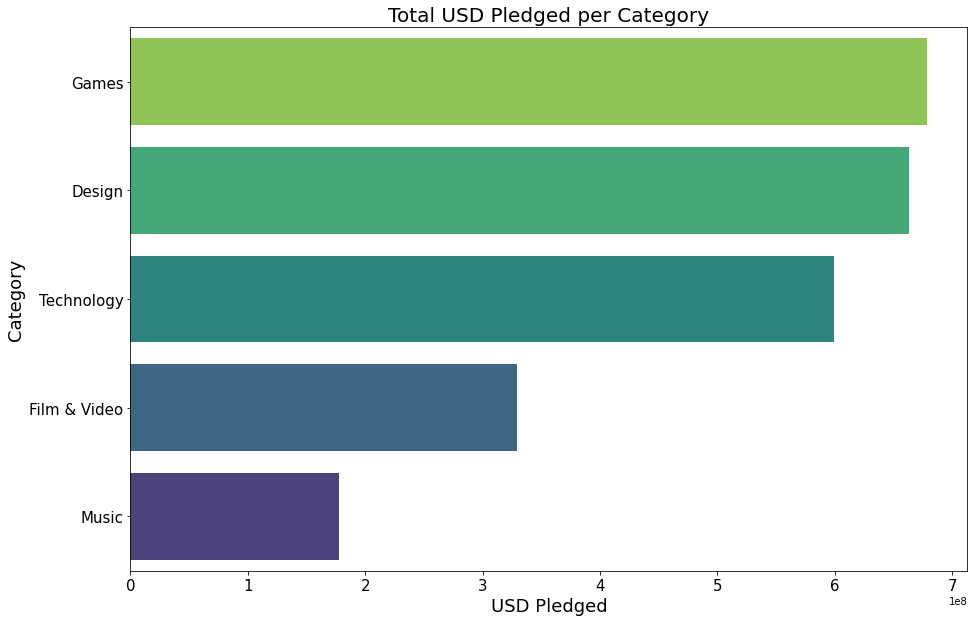

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(x='usd_pledged_real', y='main_category', data=top_five_pledged, linewidth=0.7, palette=np.array(pal_pled[::+1])[rank_pled])
plt.title('Total USD Pledged per Category', fontsize=20)
plt.xlabel('USD Pledged', fontsize=18)
plt.ylabel('Category', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

plot top 5 main categori per total backers

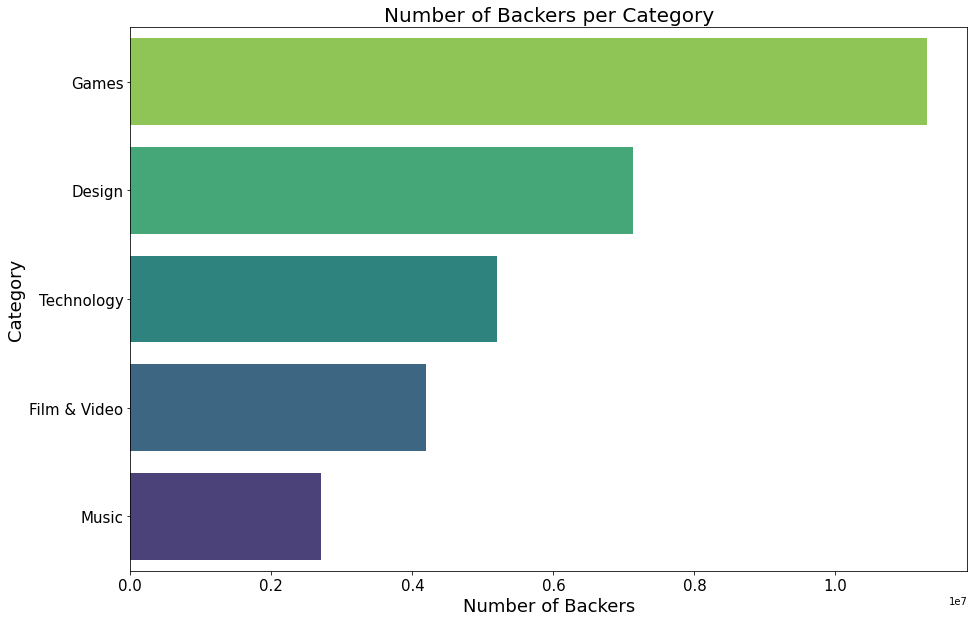

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x='backers',y='main_category', data=top_five_backers, linewidth=0.7, palette=np.array(pal_back[::+1])[rank_back])
plt.title('Number of Backers per Category', fontsize=20)
plt.xlabel('Number of Backers', fontsize=18)
plt.ylabel('Category', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

Selanjutnya saya akan menampilkan untuk semua data di main category dan usd_pledged_real 

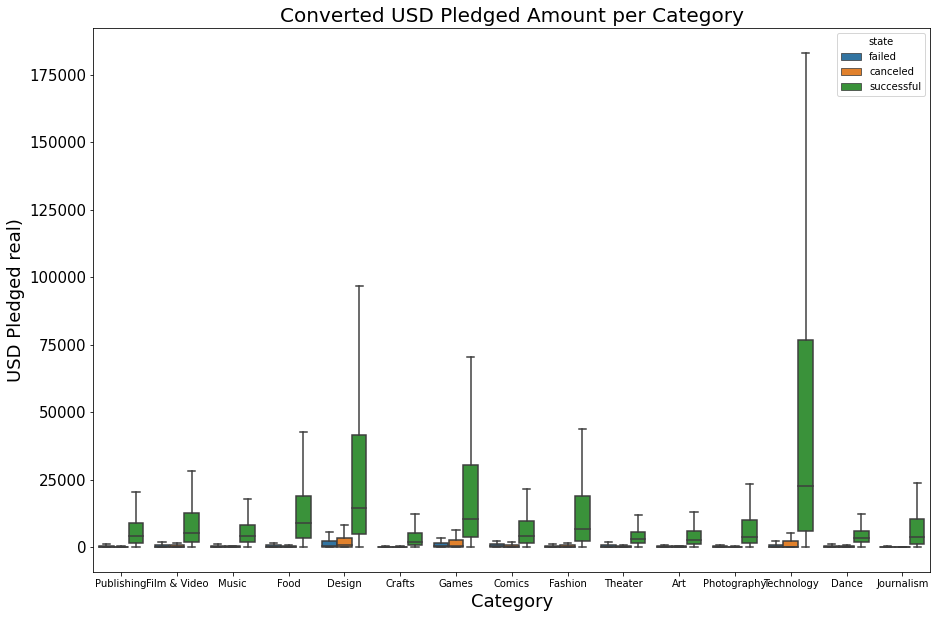

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='main_category', y='usd_pledged_real', hue='state', data=df, orient='v', showfliers=False);
plt.title('Converted USD Pledged Amount per Category', fontsize=20);
plt.xlabel('Category', fontsize=18)
plt.ylabel('USD Pledged real)', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15);

In [22]:
df.groupby(['main_category']).sum().sort_values(by='usd_pledged_real', ascending=False)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,launched_year
main_category,,,,,,,,
Games,37229931610854,1.761453e+09,7.671787e+08,11304754,5.733708e+08,7.391983e+08,1.567682e+09,69959800
Design,31808518420068,1.383802e+09,8.008834e+08,7130876,5.082245e+08,7.245260e+08,1.245555e+09,59467698
Technology,34032220878372,3.798067e+09,7.160014e+08,5201257,4.928238e+08,6.729871e+08,3.244927e+09,64008731
Film & Video,66919285092203,5.231546e+09,4.019222e+08,4190762,3.464760e+08,3.891471e+08,5.130517e+09,125402082
Music,52937830114405,8.054354e+08,1.998737e+08,2700566,1.660928e+08,1.932779e+08,7.742276e+08,99171552
Publishing,42039442345097,1.053270e+09,1.437966e+08,2217571,1.033775e+08,1.326956e+08,8.821008e+08,78647052
Fashion,23980852378205,5.578411e+08,1.479768e+08,1388135,9.702994e+07,1.292212e+08,5.052463e+08,45180885
Food,26253329091785,1.170530e+09,1.299953e+08,1320109,1.029592e+08,1.247292e+08,1.180768e+09,48883374
Art,30010601290928,1.145173e+09,1.007975e+08,1180804,7.112721e+07,9.016187e+07,1.099671e+09,56116187


Menampilkan correlation antara kolom backers dan usd_pledge_real

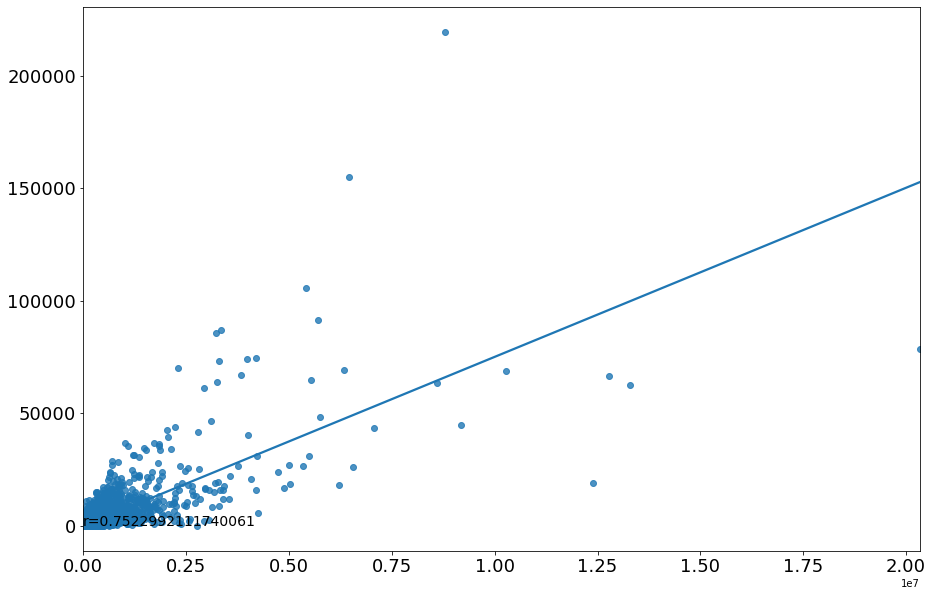

In [23]:
corr = df['usd_pledged_real'].corr(df['backers'])
#set figure size
plt.figure(figsize=(15, 10))
#plot the data
sns.regplot(data=df,x=df['usd_pledged_real'],y=df['backers'], ci=None)
#format the plot
text = 'r=%s' % (corr)
plt.text(1, 19, text, fontsize=14)
plt.title('', fontsize=20);
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

# STATISTIC ANALYSIS

Data test kali ini, saya akan melakukan 3 kali test.

1. One-Sample : 1 kategori terhadap rata-rata populasi
2. Two-Sample : 2 kategori, akan diambil contoh (tech vs food), Netherlands/Europe vs US
3. Confidence Interval : untuk mendefinisikan antara pledge amount x dan x yang seharusnya, dan juga antara jumlah dari backers x dan x yang ditargetkan

Categories (diasumsikan bahwa kategori teknologi mempunyai sumbangan tertinggi terhadap populasi)

H0: $\mu_{1} = \mu_{2}$, Tidak ada perbedaan antara total pledge untuk campaign sukses di kategori teknologi dan semua kategori

H1: $\mu_{1} \neq \mu_{2},$ Ada perbedaan antara total pledge untuk campaign sukses di kategori teknologi dan semua kategori

**ONE SAMPLE TEST** - Teknologi campaign terhadap seluruh campaign

In [24]:
sample = df[df['main_category'] == 'Technology'] 

# one-tailed, lebih besar dari 86000
sample_m = np.mean(sample['usd_pledged_real'])
m = np.mean(df['usd_pledged_real'])
print("Mean untuk usd_pledged_real untuk Kategori Teknologi adalah:", sample_m)
print("Mean usd_pledged_real untuk semua kategori adalah:", m)

# menghitung test statistics
t, p = stats.ttest_1samp(sample['usd_pledged_real'], m)

alpha = 0.05
if (t > 0) & (p/2 < alpha):
    print("We reject the null hypothesis, the mean is greater than {}", format(m))
else:
    print("accept null hypothesis")

print(t, p)

Mean untuk usd_pledged_real untuk Kategori Teknologi adalah: 21186.435890760233
Mean usd_pledged_real untuk semua kategori adalah: 9147.736258611474
We reject the null hypothesis, the mean is greater than {} 9147.736258611474
17.025243578581573 1.0344657063961233e-64


Saya akan membuktikan bahwa usd_pledged_real berdisribusi normal

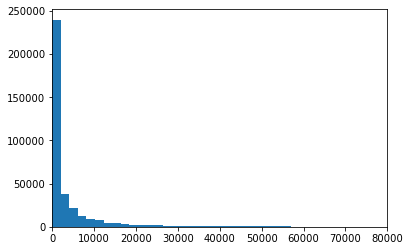

In [25]:
plt.hist(x=df['usd_pledged_real'], bins=10000)
#plt.ticklabel_format(useOffset=False)
plt.xlim(0,80000)
plt.show()

**TWO SAMPLE TEST**

<ipython-input-26-15592c251cf1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_campaigns['tech_vs_other'] = np.where(successful_campaigns['main_category']=='Technology', 'Technology', 'Other')


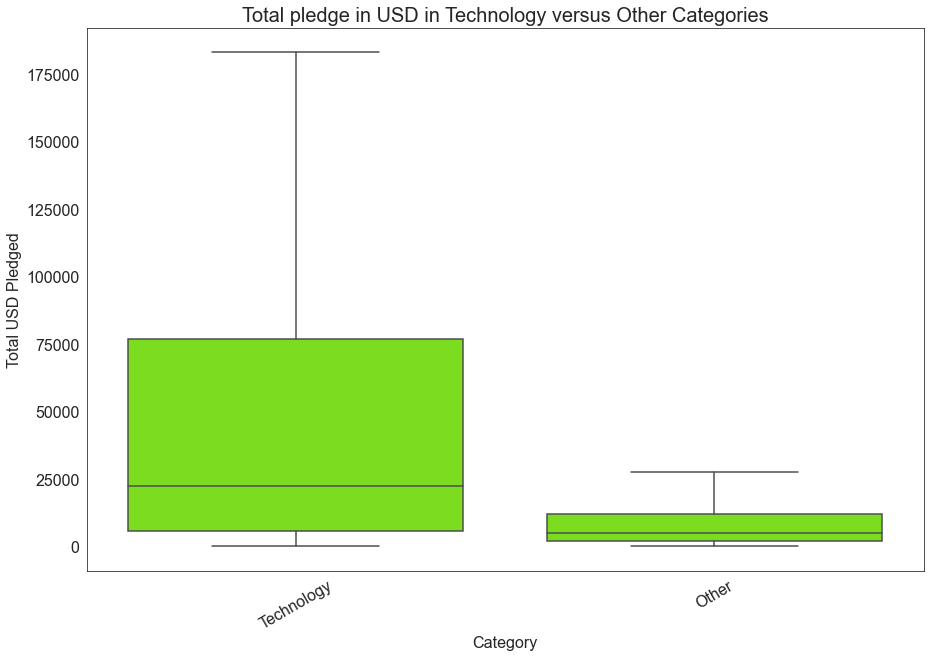

In [26]:
#Membuat variabel untuk test antara kategori teknologi dengan kategori lainnya
successful_campaigns = df.loc[df['state'] == 'successful']
successful_campaigns_tech = successful_campaigns.loc[successful_campaigns['main_category'] == 'Technology']
successful_campaigns_other = successful_campaigns.loc[successful_campaigns['main_category'] != 'Technology']

#Ploting
sns.set_style("white")
successful_campaigns['tech_vs_other'] = np.where(successful_campaigns['main_category']=='Technology', 'Technology', 'Other')
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.boxplot(x="tech_vs_other", y="usd_pledged_real", data=successful_campaigns, order=["Technology", "Other"], showfliers=False, color="lawngreen")
plt.title('Total pledge in USD in Technology versus Other Categories', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Total USD Pledged', fontsize=16)
plt.xticks(fontsize=16)
plt.xticks(rotation=30)
plt.yticks(fontsize=16);

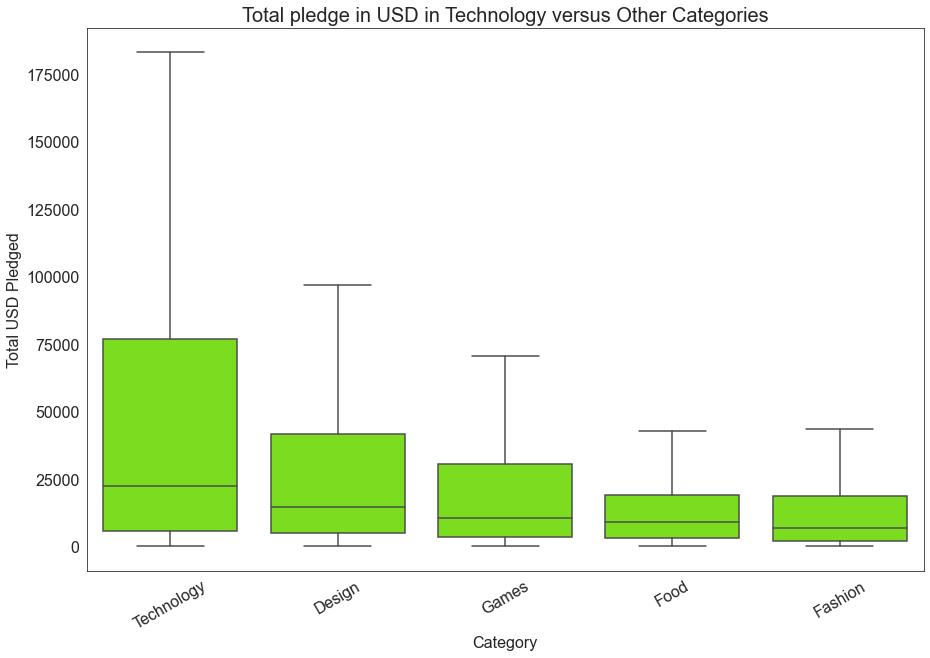

In [27]:
#Plot boxplots teknologi versus lima top categories berdasarkan jumlahnya
plt.figure(figsize=(15,10))
sns.set_style("white")
ax = sns.boxplot(x="main_category", y="usd_pledged_real", data=successful_campaigns, order=["Technology", "Design", "Games", "Food", "Fashion"], showfliers=False, color="lawngreen")

#Lay-out
plt.title('Total pledge in USD in Technology versus Other Categories', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Total USD Pledged', fontsize=16)
plt.xticks(fontsize=16)
plt.xticks(rotation=30)
plt.yticks(fontsize=16);

In [28]:
#Two sample t-test

#Memutuskan apakah nilai variance sama? True or False
ttest_ind(successful_campaigns_tech['usd_pledged_real'], successful_campaigns_other['usd_pledged_real'], equal_var=False)
ttest_ind(successful_campaigns_tech['usd_pledged_real'], successful_campaigns_other['usd_pledged_real'], equal_var=True)

Ttest_indResult(statistic=38.52552210308711, pvalue=0.0)

**Kesimpulan**

Nilai p-value lebih kecil dari 0.05, sehingga kita bisa me-reject H0. Tidak ada perbedaan antara total pledge untuk campaign sukses di kategori teknologi dan semua kategori. dengan kata lain kesempatan untuk campaign sukses di kategori teknologi lebih tinggi dari ketegori lainnya.

**HYPOTHESIS 2**

US vs NL 

H0: $\mu_{1} = \mu_{2}$, Tidak ada perbedaan antara total pledge untuk semua campaign di NL vs di US 

H1: $\mu_{1} \neq \mu_{2},$ Ada perbedaan antara total pledge untuk semua campaign di NL vs di US 

In [29]:
# buat dua samples: satu US and satu NL 
df_us = df.loc[df['country']=='US']
df_nl = df.loc[df['country']=='NL']
df_usnl = df[((df['country'] == 'US') | (df['country'] == 'NL'))]
print('Number of records US: ', len(df_us))
print('Number of records NL: ', len(df_nl))
print('Number of records Us & NL: ', len(df_usnl))

Number of records US:  289665
Number of records NL:  2807
Number of records Us & NL:  292472


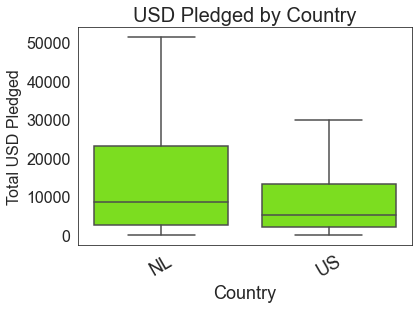

In [30]:
ax = sns.boxplot(x="country", y="usd_pledged_real", data=successful_campaigns, order=["NL", "US"], showfliers=False, color=("lawngreen"))
plt.title('USD Pledged by Country', fontsize=20);
plt.xlabel('Country', fontsize=18)
plt.ylabel('Total USD Pledged', fontsize=16)
plt.xticks(fontsize=18)
plt.xticks(rotation=30)
plt.yticks(fontsize=16);

In [31]:
ttest_ind(df_us['usd_pledged_real'], df_nl['usd_pledged_real'], equal_var=False)
ttest_ind(df_us['usd_pledged_real'], df_nl['usd_pledged_real'], equal_var=True)

Ttest_indResult(statistic=-0.3580424058199417, pvalue=0.7203118374327935)

**Kesimpulan**

Dikarenakan p-value lebih besar dari 0.05, maka kita tidak me-reject H0, atau Ada perbedaan antara total pledge untuk semua campaign di NL vs di US, dengan kata lain untuk menacapai campaign itu suskses di US tidak lebih tinggi dari NL.

# CONFIDENCE INTERVAL

In [32]:
# buat Sample yang merepresentasikan pledged US dollars untuk succesful campaigns dengan “Tech” category
succesful_campaigns = df.loc[df['state'] == 'successful']
succesful_campaigns_tech = succesful_campaigns.loc[succesful_campaigns['main_category'] == 'Technology']
sample = succesful_campaigns_tech['usd_pledged_real']

#Hitung degrees of freedom
dfree = len(sample) -1

#Hitung t-statistic, mean and standard error
t = stats.t.interval(0.95,dfree)[1]
x  = np.mean(sample)
se = np.std(sample) / np.sqrt(len(sample))

#Define confidence intervals
con_int = [round(num,3) for num in [x - (t * se) , x + (t * se)]]
print('Dengan 95 % confidence, Rata-rata usd_pledged untuk sebuah succesful campaign di kategori Technology adalah antara:', round(con_int[0]), 'and', round(con_int[1]), 'dollar')

Dengan 95 % confidence, Rata-rata usd_pledged untuk sebuah succesful campaign di kategori Technology adalah antara: 86574 and 99598 dollar


In [33]:
#  buat Sample yang merepresentasikan the numbers of backers untuk succesful campaigns dengan “Tech” category
sample = succesful_campaigns_tech['goal']

#Compute degrees of freedom
dfree = len(sample) -1

#Compute t-statistic, mean and standard error
t = stats.t.interval(0.95,dfree)[1]
x  = np.mean(sample)
se = np.std(sample) / np.sqrt(len(sample))

#Define confidence intervals
con_int = [round(num,3) for num in [x - (t * se) , x + (t * se)]]
print('Dengan 95 % confidence, Rata-rata goal untuk sebuah a succesful campaign di kategori Technology adalah antara:', round(con_int[0]), 'and', round(con_int[1]), 'dollar')

Dengan 95 % confidence, Rata-rata goal untuk sebuah a succesful campaign di kategori Technology adalah antara: 26918 and 29752 dollar


# KESIMPULAN 

Dari Statistic Analysis data diatas disimpulkan bahwa:
    
1. Kesempatan untuk subuah campaign itu sukses di kategori teknologi lebih tinggi dari ketegori lainnya.

2. Kesempatan untuk sebuah campaign itu suskses di US (United State) tidak lebih tinggi dari NL (Netherlands)

3. Rata-rata usd_pledged untuk succesful campaign di Technology adalah antara: 86574 and 99598 dollar
    
4. Rata-rata goal untuk sebuah a succesful campaign di kategori Technology adalah antara: 26918 and 29752 dollar